In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

In [132]:
countries = pd.read_csv('countries of the world.csv')
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [155]:
countries = pd.read_csv('countries of the world.csv')
countries.columns = ['Country', 'Region', 'Population', 'Area',
       'Density', 'Coastline',
       'Migration', 'Infant mortality',
       'GDP', 'Literacy', 'Phones', 'Arable',
       'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service']
countries.head()

,Country,Region,Population,Area,Density,Coastline,Migration,Infant mortality,GDP,Literacy,Phones,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [156]:
type(list(countries.columns))

list

In [157]:
for column in ['Density', 'Coastline', 'Migration', 'Infant mortality','Literacy', 'Phones', 'Arable', 'Crops', 'Other','Birthrate', 'Deathrate','Agriculture', 'Industry', 'Service']:
    countries[column] = list(map(lambda x: str(x).replace(',','.'), countries[column]))
    countries[column] = countries[column].astype('float64')
    print(countries[column].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [158]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Density           227 non-null    float64
 5   Coastline         227 non-null    float64
 6   Migration         224 non-null    float64
 7   Infant mortality  224 non-null    float64
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    float64
 10  Phones            223 non-null    float64
 11  Arable            225 non-null    float64
 12  Crops             225 non-null    float64
 13  Other             225 non-null    float64
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    float64
 16  Deathrate         223 non-null    float64
 1

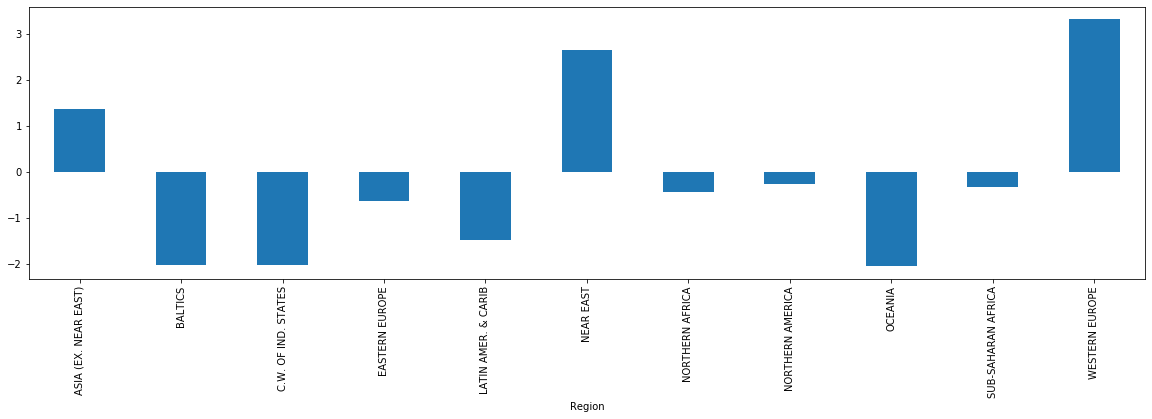

In [178]:
#Строим столбчатую диаграмму миграци и видим отток населения из океании
regional = countries.groupby('Region').mean()
for column in regional:
    regional['Migration'].plot(kind = 'bar', y = column)


In [160]:
# исследуем миграцию в океании
countries[['Region', 'Country', 'Migration']][countries.Region != 'NEAR EAST']
countries.iloc[3,1]

'OCEANIA                            '

In [163]:
countries['Region'] = list(map(lambda x: str(x).strip(), countries['Region']))
countries['Country'] = list(map(lambda x: str(x).strip(), countries['Country']))
countries.iloc[3,1]

'OCEANIA'

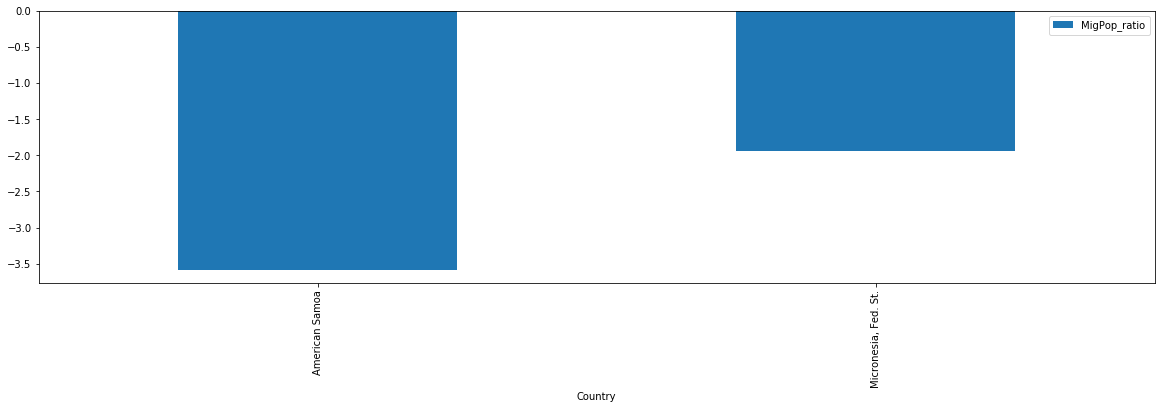

In [193]:
countries['MigPop_ratio'] = countries['Migration'] / countries['Population']*10000
countries[(countries['Region'] == 'OCEANIA')& ((countries['MigPop_ratio'] > 1.5) | (countries['MigPop_ratio'] < -1.5))].plot(kind = 'bar', x = 'Country', y = 'MigPop_ratio')

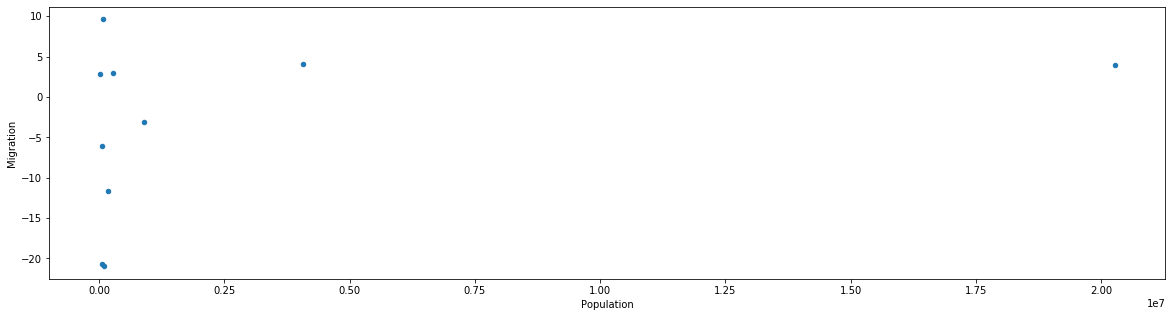

In [180]:
countries[(countries['Region'] == 'OCEANIA') & (countries['Migration'] != 0)].plot (kind = 'scatter', x = 'Population', y = 'Migration', stacked = True)